# ggrepel

- geom_text_repel()
- geom_label_repel()

These functions apply a force-based layout algorithm to text labels, resolving overlaps by dynamically repositioning them. Labels repel each other, associated data points, and are constrained to remain within the plotting area.


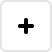
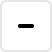
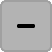
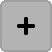
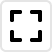
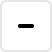
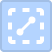
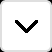
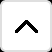
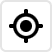
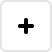
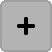
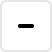
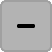
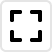
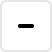
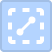
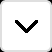
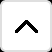
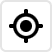

In [1]:
from lets_plot import *

import numpy as np
import pandas as pd
import random

LetsPlot.setup_html() 

In [2]:
mtcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")

In [3]:
dat = mtcars[mtcars['wt'] > 2.0]
dat = dat[dat['wt'] < 3.65]

dat2 = mtcars[mtcars['wt'] > 2.5]
dat2 = dat[dat['wt'] < 3]

dat3 = dat2[dat2['model'] == 'Fiat 128']

In [4]:
plot = ggplot(dat, aes('wt', 'mpg', label = 'model')) + geom_point(color = "red")
plot2 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(color = "red")

### Comparison of geom_text() and geom_text_repel()

In [5]:
gggrid([
    plot2 + geom_text() + ggtitle('geom_text()'), 
    plot2 + geom_text_repel() + ggtitle('geom_text_repel()'),
])

### geom_label_repel()
All of the parameters discussed below apply equally to both `geom_text_repel()` and `geom_label_repel()`. For simplicity, we will use `geom_text_repel()` in the examples.

In [6]:
gggrid([
    plot2 + geom_label() + ggtitle('geom_label()'), 
    plot2 + geom_label_repel() + ggtitle('geom_label_repel()'),
])

### `seed` parameter 
Controls the randomization to produce the same label layout each time the plot is generated.

In [7]:
gggrid([
    plot2 + geom_text_repel() + ggtitle('Without seed'), 
    plot2 + geom_text_repel() + ggtitle('Without seed'),
    plot2 + geom_text_repel(seed=4) + ggtitle('With seed'), 
    plot2 + geom_text_repel(seed=4) + ggtitle('With seed'),
], ncol=2)

In some cases, it may be necessary to find a seed value that produces a more optimal label arrangement. A simple approach is to re-render the plot multiple times until you're satisfied with the result, then use the corresponding seed to reproduce it.

In [8]:
rand_int = random.randint(1, 1000)
print("seed =", rand_int)
plot2 + geom_text_repel(seed=rand_int)

seed = 521


### `max_iter` parameter
Controls the maximum number of iterations used by the layout algorithm, helping to reduce notebook rendering time. More iterations generally lead to better label placement, but at the cost of increased computation time. For plots with a small number of labels, 200–300 iterations are often sufficient.
The default value is 2000.

In [9]:
seed = 530
gggrid([
    plot2 + geom_text_repel(seed=seed, max_iter=2) + ggtitle('max_iter=2'), 
    plot2 + geom_text_repel(seed=seed, max_iter=20) + ggtitle('max_iter=20'),
    plot2 + geom_text_repel(seed=seed, max_iter=200) + ggtitle('max_iter=200'),
])

### `max_time` parameter
Another way to limit plot rendering time is by using the `max_time` parameter. This primarily serves as a safeguard against excessive computation when a large number of text labels are involved. Time is specified in seconds. The default value is `5` seconds, but you can disable the time limit by setting it to `-1` if needed.

In [10]:
gggrid([
    plot2 + geom_text_repel(seed=seed, max_time=0.001) + ggtitle('max_time=0.001'), 
    plot2 + geom_text_repel(seed=seed, max_time=0.01) + ggtitle('max_time=0.01'),
    plot2 + geom_text_repel(seed=seed, max_time=-1) + ggtitle('max_time=-1'),
])

### `direction` parameter
Restricts the movement of a text label relative to its anchor point to a specific direction. The default value is `both`.

In [11]:
gggrid([
    plot2 + geom_text_repel(seed=seed, direction='x') + ggtitle('direction = x'), 
    plot2 + geom_text_repel(seed=seed, direction='y') + ggtitle('direction = y'),
    plot2 + geom_text_repel(seed=seed, direction='both') + ggtitle('direction = both'),
])

As we can see, this option is of limited use for randomly scattered points, but in certain cases it can be extremely helpful:

In [12]:
plotX = ggplot(dat2) + geom_point(aes(x='wt', label = 'model'), y = 1, color='red') + xlim(2, 3) + ylim(1, 1.3) + \
    geom_text_repel(
        aes(x='wt', label = 'model'), 
        y = 1, 
        nudge_y = 0.05, 
        direction = 'x', 
        angle = 90,
        hjust = 0.0,
        seed = seed
    ) 

plotY = ggplot(dat2) + geom_point(aes(y='mpg', label = 'model'), x = 1, color='red') + xlim(0.9, 1.3) + ylim(19, 35) + \
    geom_text_repel(
        aes(y='mpg', label = 'model'), 
        x = 1, 
        nudge_x = 0.05, 
        direction = 'y', 
        hjust = 0.0,
        seed = seed
    ) 
gggrid([
    plotX + ggtitle('direction = x'), 
    plotY + ggtitle('direction = y'),    
])

### `point_padding` and `box_padding` parameters
These parameters control the amount of spacing around text labels.

- `point_padding` adds space between the label and all nearby points, but does not affect spacing between labels.

- `box_padding` adds space between labels, but does not affect spacing between the label and the data point.

In [13]:
gggrid([
    plot + geom_text_repel(seed=seed, max_time=-1, point_padding=10) + ggtitle('point_padding'), 
    plot + geom_text_repel(seed=seed, max_time=-1, box_padding=10) + ggtitle('box_padding'),    
])

### `max_overlaps` parameter
Specifies the maximum allowed number of overlaps with other labels. Labels that exceed this threshold will be omitted from the plot. The default value is `10`. You can disable overlap filtering entirely by setting this parameter to `-1`.

In [14]:
gggrid([
    plot + geom_text_repel(seed=seed, max_time=-1, max_overlaps=5) + ggtitle('max_overlaps=5'), 
    plot + geom_text_repel(seed=seed, max_time=-1, max_overlaps=-1) + ggtitle('max_overlaps=-1'),    
])

### `min_segment_length` parameter
Sets the minimum length for the line connecting a label to its associated point. Lines shorter than this length will not be drawn. To display all lines, use the default value of `0`. To hide all lines, set the value to something very large. 
`min_segment_length` uses the same units as `point_size`, so be careful when using `min_segment_length` together with `size_unit` (see below).

In [15]:
gggrid([
    plot + geom_text_repel(seed=seed, max_time=-1, min_segment_length=0) + ggtitle('min_segment_length=0'), 
    plot + geom_text_repel(seed=seed, max_time=-1, min_segment_length=9999) + ggtitle('min_segment_length=9999'),    
])

### `point_size` aesthetic
Allows you to pass to geom_text_repel() the data used to determine point sizes in a geom_point() layer. This helps accurately detect overlaps between labels and points when point sizes vary.

In [16]:
plot3 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(aes(size='gear'), color = "red") + theme(legend_position='none')
gggrid([
    plot3 + geom_text_repel(seed=seed, max_time=-1) + ggtitle('without point_size'), 
    plot3 + geom_text_repel(aes(point_size='gear'), seed=seed, max_time=-1) + ggtitle('with point_size'),    
])

You can also provide a constant value instead.

In [17]:
plot3 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(size = 10, color = "red") + theme(legend_position='none')
gggrid([
    plot3 + geom_text_repel(seed=seed, max_time=-1) + ggtitle('without point_size'), 
    plot3 + geom_text_repel(seed=seed, max_time=-1, point_size = 10) + ggtitle('with point_size'),    
])

### `size_unit` parameter
The `size_unit` parameter can be used in `geom_point()` to define the unit of measurement for the `size` aesthetic. In this case, it is recommended to also use `size_unit` in `geom_text_repel()` to ensure that point sizes are calculated correctly.

In [18]:
plot4 = ggplot(dat2, aes('wt', 'mpg', label='model')) + geom_point(size=1, size_unit='y', color="red") + theme(legend_position='none')
gggrid([
    plot4 + geom_text_repel(seed=seed, max_time=-1, point_size=1) + ggtitle('without size_unit'), 
    plot4 + geom_text_repel(seed=seed, max_time=-1, point_size=1, size_unit='y') + ggtitle('with size_unit'),    
]) + ggtb()

##### `size_unit` applies to all size-related parameters: `point_size`, `min_segment_length`, `point_padding`, and `box_padding`.
As an example, consider how it affects `min_segment_length`.
As mentioned earlier, `min_segment_length` uses the same units as `point_size`. Therefore, in the following example, with the same `min_segment_length` value, some lines are not drawn in the second case because their length is less than one unit along the y-axis. 

In [19]:
plot5 = ggplot(dat2, aes('wt', 'mpg', label='model')) + theme(legend_position='none')
gggrid([
    plot5 + geom_point(size=10, color="red") \
        + geom_text_repel(seed=seed, max_time=-1, point_size=10, min_segment_length=1) + ggtitle('without size_unit'), 
    plot5 + geom_point(size=1, size_unit='y', color="red") \
        + geom_text_repel(seed=seed, max_time=-1, point_size=1, min_segment_length=1, size_unit='y') + ggtitle('with size_unit'),    
]) + ggtb()

### `segment_color` aesthetic
Allows you to specify the color of the line connecting the label to the point. By default, the line color matches the text color and follows the `color` aesthetic. In the example below, the `color` aesthetic is defined globally for all layers, so the colors of the points, text, and lines are the same.

In [20]:
ggplot(dat2, aes('wt', 'mpg', label = 'model', color='wt')) + geom_point() + geom_text_repel(seed=seed, max_time=-1)

By using the `color` and `segment_color` aesthetics together, you can assign different colors to the points, labels, and connecting lines.

In [21]:
plot5 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + theme(legend_position='none')
gggrid([
    plot5 + geom_point(aes(color='wt')) + geom_text_repel(aes(segment_color='wt'), seed=seed, max_time=-1) + ggtitle('Same color for points and lines'), 
    plot5 + geom_point(color='red') + geom_text_repel(aes(color='wt'), seed=seed, max_time=-1) + ggtitle('Same color for text and line'), 
    plot5 + geom_point(color='red') + geom_text_repel(color='green', segment_color='blue', seed=seed, max_time=-1) + ggtitle('Different colors'), 
])

### `segment_alpha` aesthetic
Specifies the transparency level of the connecting lines between labels and points. By default, the segment transparency inherits from the text and is governed by the `alpha` aesthetic.

In [22]:
ggplot(dat2, aes('wt', 'mpg', label = 'model')) + \
    geom_point(color='red') + \
    geom_text_repel(point_padding=20, color='red', segment_alpha=0.1, seed=seed, max_time=-1)

### `segment_size` aesthetic
Specifies the width of the line connecting the label to the point.

In [23]:
plot2 + geom_text_repel(segment_size=2, seed=seed, max_time=-1)

### `linetype` aesthetic

In [24]:
ggplot(dat2) + geom_point(aes(y='mpg', label = 'model'), x = 1, color='red') + xlim(0.9, 1.3) + ylim(19, 35) + \
    geom_text_repel(
        aes(y='mpg', label = 'model', linetype = 'disp'), 
        x = 1, 
        nudge_x = 0.2, 
        direction = 'y', 
        hjust = 0.0,        
        seed = seed
    )

### `arrow` parameter

In [25]:
ggplot(dat2) + geom_point(aes(y='mpg', label = 'model'), x = 1, color='red') + xlim(0.9, 1.3) + ylim(19, 35) + \
    geom_text_repel(
        aes(y='mpg', label = 'model'), 
        x = 1, 
        nudge_x = 0.2, 
        direction = 'y', 
        hjust = 0.0,   
        arrow = arrow(type='closed', angle=10, ends='both'),
        seed = seed
    )